<a href="https://colab.research.google.com/github/2003MADHAV/computational-linguistics-natural-language-processing-EXP/blob/main/Ex_6_Parse_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

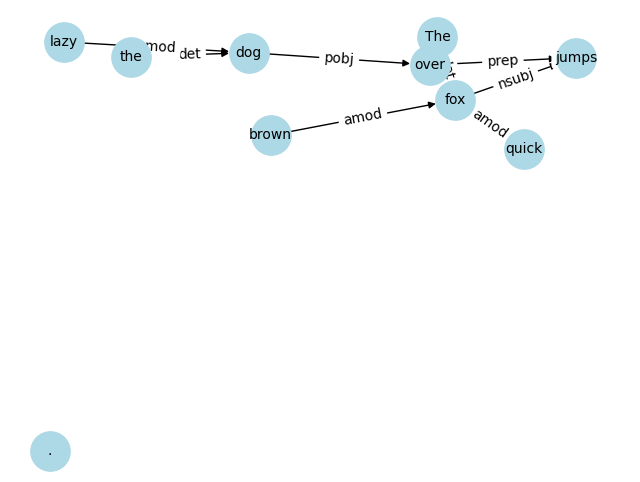

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the English language model (you need to install spaCy and download the model)
nlp = spacy.load("en_core_web_sm")

# Define a function to create a parse tree as a graph
def create_parse_tree(sentence):
    # Process the input sentence using spaCy
    doc = nlp(sentence)

    # Initialize a directed graph
    graph = nx.DiGraph()

    # Add nodes for each token
    for token in doc:
        graph.add_node(token.text)

    # Add edges for syntactic dependencies
    for token in doc:
        if token.dep_ != 'punct':  # Ignore punctuation
            graph.add_edge(token.text, token.head.text, label=token.dep_)

    # Create a Matplotlib figure and axis explicitly
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw the parse tree
    pos = nx.spring_layout(graph, seed=42)  # Position the nodes
    labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, ax=ax, with_labels=True, node_size=800, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.axis('off')  # Turn off axis
    plt.savefig('parse_tree.png', format='png', bbox_inches='tight')  # Save as an image file
    plt.show()

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Create and save the parse tree for the example sentence
create_parse_tree(sentence)
